In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
cols = ['pixel{i}'.format(i=x) for x in list(range(784))]
cols.insert(0,'label')
#cols.append('label')

In [ ]:
mnist = pd.read_csv("mnist_test.csv", names= cols)

mnist.shape

(10000, 785)

In [ ]:
mnist.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
label = mnist.label

In [ ]:
mnist = mnist.loc[:,'pixel0':'pixel783']
#mnist.drop('label',axis=1)

In [ ]:
mnist.shape

(10000, 784)

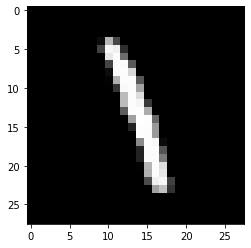

In [ ]:
img = mnist.loc[191].to_numpy().reshape(28,28)
plt.imshow(img,cmap='gray')


In [ ]:
label[191]

1

In [ ]:
from sklearn.preprocessing import StandardScaler

std_mnist = StandardScaler().fit_transform(mnist)

In [ ]:
std_mnist.shape

(10000, 784)

In [ ]:
std_mnist_transpose = np.transpose(std_mnist.copy())


cov = np.matmul(std_mnist_transpose, std_mnist)

In [ ]:
cov.shape

(784, 784)

In [ ]:
from scipy.linalg import eigh


eigvals, eigvecs = eigh(cov,eigvals=(782,783))

# select top 2
#eigvals = eigvals[-2:]
#eigvecs = eigvecs[-2:]


In [ ]:
std_mnist.shape

(10000, 784)

In [ ]:
eigvecs.shape

(784, 2)

In [ ]:
 # Get projection
#eigvec_transpose = np.transpose(eigvecs);
#eigvec_transpose.shape

projected_mnist = np.matmul(std_mnist,eigvecs)

In [ ]:
projected_mnist.shape

(10000, 2)

In [ ]:
pc_mnist = np.hstack((projected_mnist, label.to_numpy().reshape(10000,1) ))

In [ ]:
mnistdf = pd.DataFrame(data = pc_mnist,columns = ['pc1','pc2','label'])
mnistdf.head()

,pc1,pc2,label
0,6.414007,-5.458311,7.0
1,-8.028850,2.804432,2.0
2,-3.864044,-7.411241,1.0
3,0.045991,8.751242,0.0
4,6.296290,-0.065756,4.0


In [1]:
plt.close()
sns.FacetGrid(mnistdf,hue="label",size=12).map(plt.scatter,"pc1","pc2").add_legend()
plt.show()

NameError: ignored